In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


In [2]:
from acs_plotting_maps import plot_acs_hazard, regions_dict, cmap_dict, tick_dict
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors, cm


In [3]:
tick_dict.keys()

dict_keys(['pr_annual', 'pr_6mon', 'pr_3mon', 'pr_mon', 'pr_hour', 'pr_days', 'pr_anom_mon', 'pr_anom_3mon', 'pr_anom_6mon', 'pr_anom_ann', 'pr_diff_mon', 'pr_diff_ann', 'frost_days', 'frost_days_mon', 'tas', 'tas_anom_day', 'tas_anom_mon', 'tas_anom_ann', 'apparent_tas', 'HWN', 'HWF', 'HWAtx', 'HWD', 'TXge35', 'TNle02', 'percent', 'xts_freq', 'fire_climate_ticks', 'fire_climate_labels', 'aridity_index_ticks', 'aridity_index_labels'])

In [4]:
# Fire classes

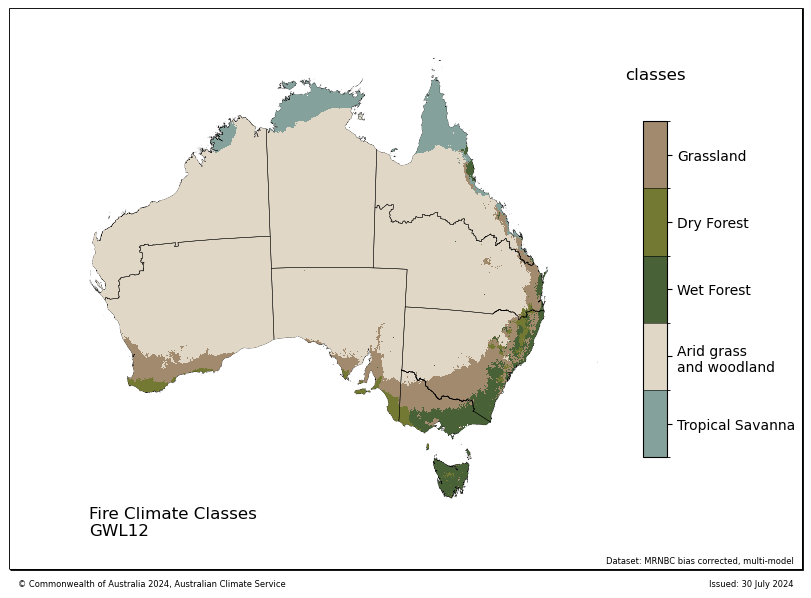

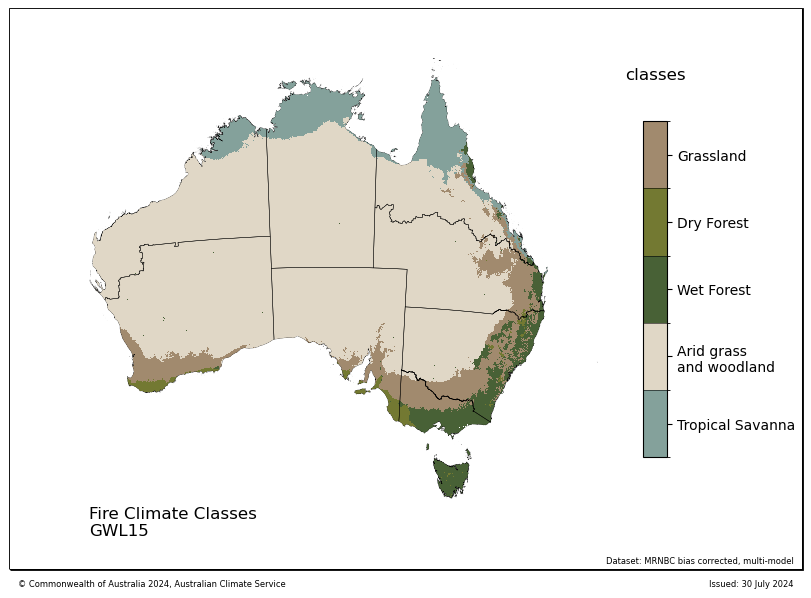

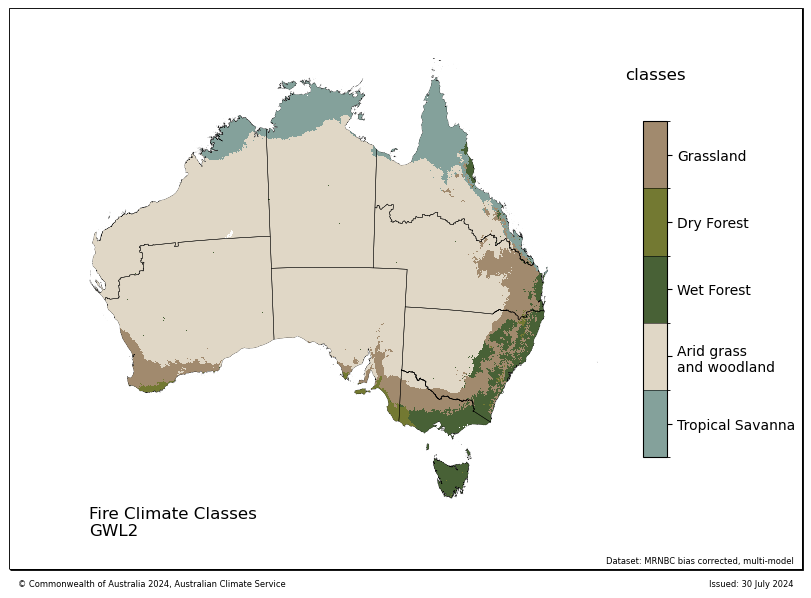

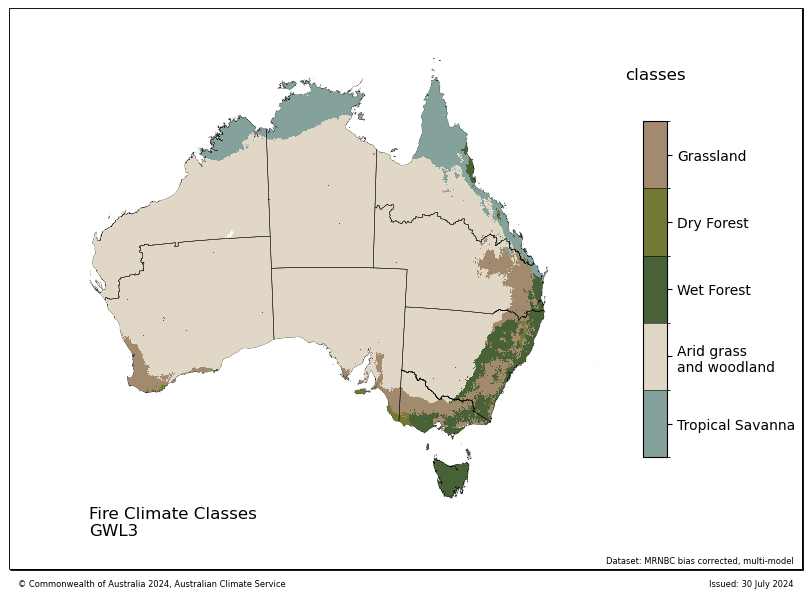

In [5]:

for gwl in ["GWL12", "GWL15", "GWL2", "GWL3"]: 
    ds = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_{gwl}.nc")
    plot_acs_hazard(data = ds.fire_climate_class,
                    regions = regions_dict['ncra_regions'],
                    title = "Fire Climate Classes",
                    date_range = gwl,
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = tick_dict["fire_climate_labels"],
                    cbar_label = "classes",
                    dataset_name = "MRNBC bias corrected, multi-model",
                    outfile = f"/g/data/mn51/users/gt3409/plotting_maps/ministerial_brief_figures/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_{gwl}.png",
                    watermark="",
                    show_logo=False,
                    contour=False,
                    contourf=False,
                    );

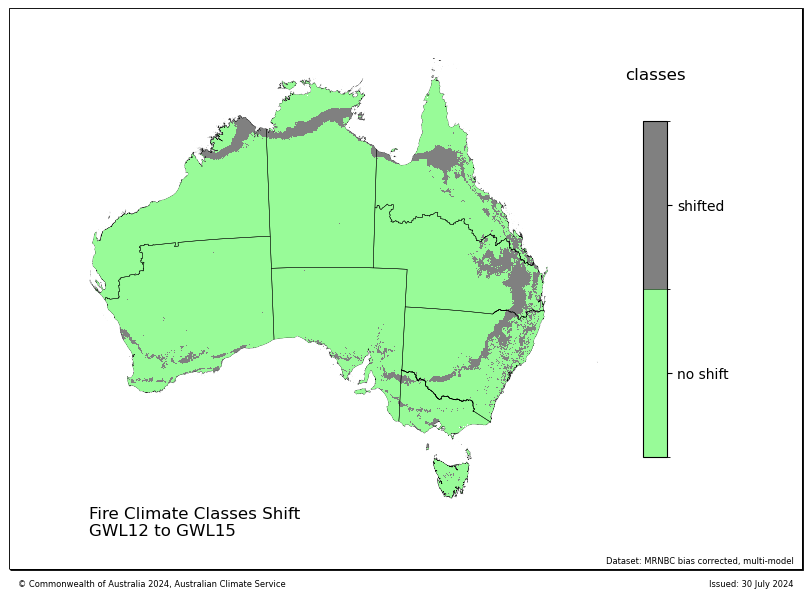

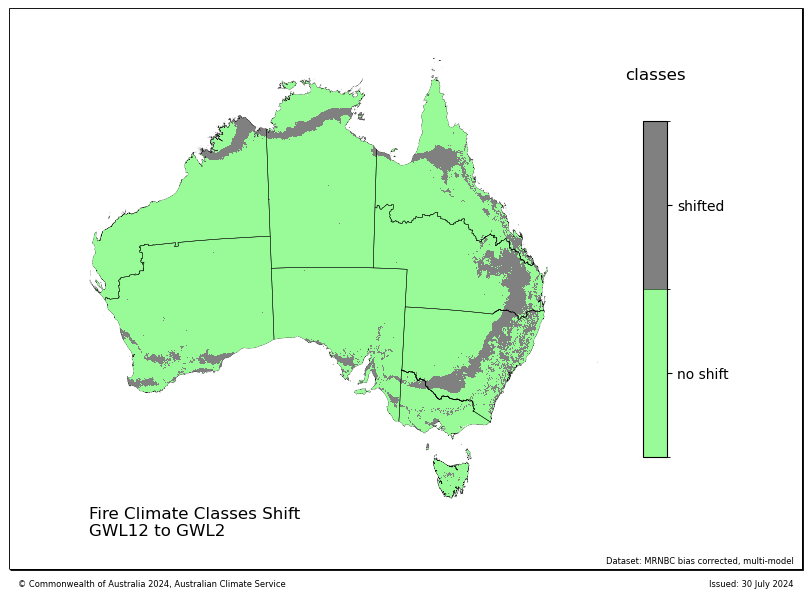

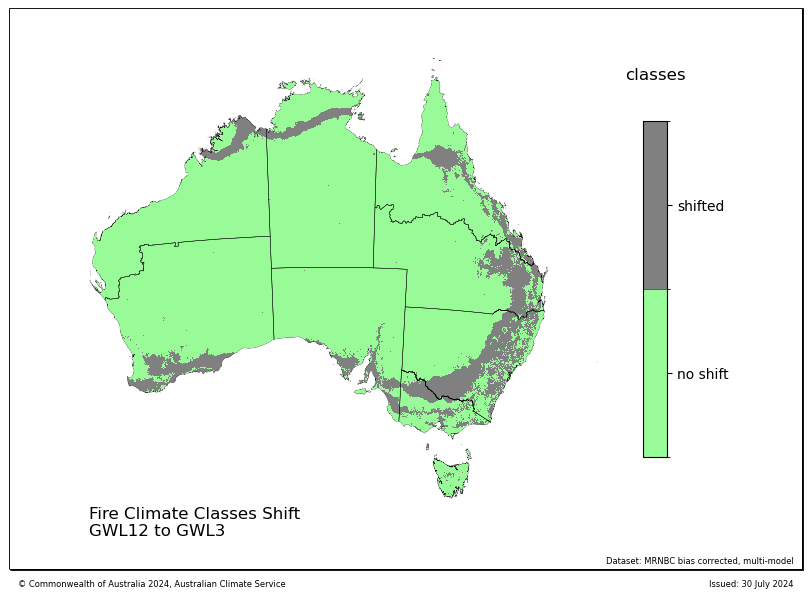

In [6]:
for gwl in ["GWL15", "GWL2", "GWL3"]: 
    ds = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_{gwl}.nc")
    da = ds.fire_climate_class
    plot_acs_hazard(data = da,
                    regions = regions_dict['ncra_regions'],
                    title = "Fire Climate Classes Shift",
                    date_range = f"GWL12 to {gwl}",
                    cmap = colors.ListedColormap(["palegreen", "grey",]),
                    ticks = [0, 1,],
                    tick_labels = ["no shift", "shifted",],
                    cbar_label = "classes",
                    dataset_name = "MRNBC bias corrected, multi-model",
                    watermark="",
                    show_logo=False,
                    outfile = f"/g/data/mn51/users/gt3409/plotting_maps/ministerial_brief_figures/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_{gwl}.png",
                    contour=False,
                    contourf=False,
                    );

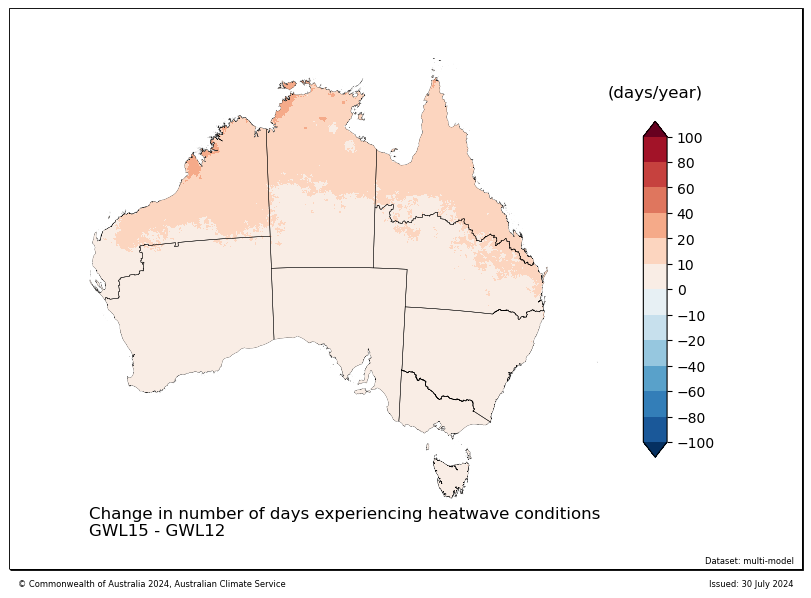

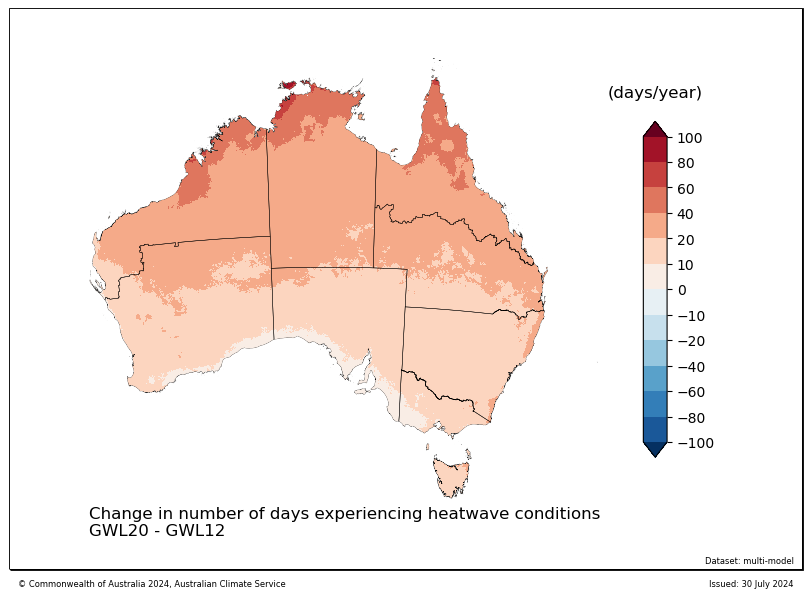

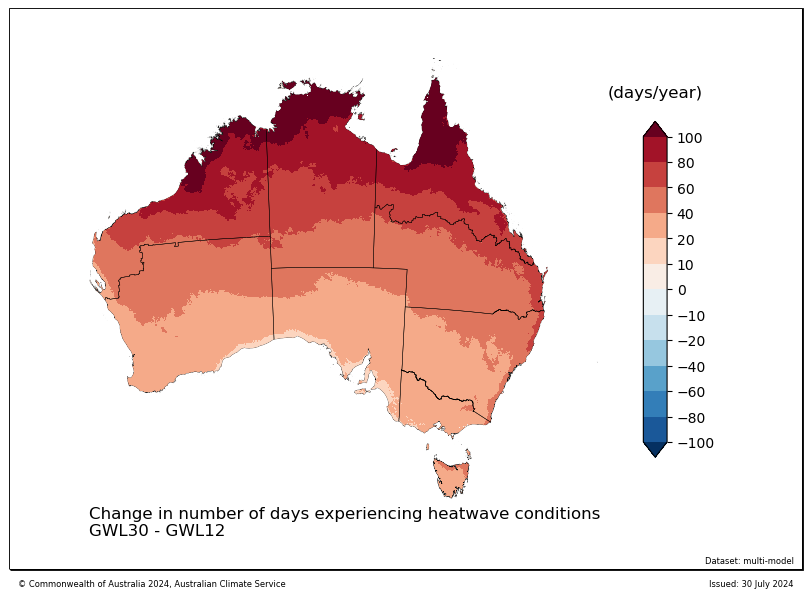

In [8]:
# heat 
var = "HWF"
for gwl in ["GWL15", "GWL20", "GWL30"]: 
    ds = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_{gwl}-GWL12-change.nc")
    da = ds[var]
    plot_acs_hazard(data = da,
                    regions = regions_dict['ncra_regions'],
                    title = "Change in number of days experiencing heatwave conditions",
                    date_range = f"{gwl} - GWL12",
                    cmap = cmap_dict["tas_anom"],
                    ticks = [-100, -80, -60, -40, -20, -10, 0, 10, 20, 40, 60, 80, 100],
                    cbar_label = "(days/year)",
                    dataset_name = "multi-model",
                    watermark="",
                    show_logo=False,
                    outfile = f"/g/data/mn51/users/gt3409/plotting_maps/ministerial_brief_figures/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_{gwl}-GWL12-change.png",
                    contour=False,
                    contourf=False,
                    cbar_extend="both"
                    );

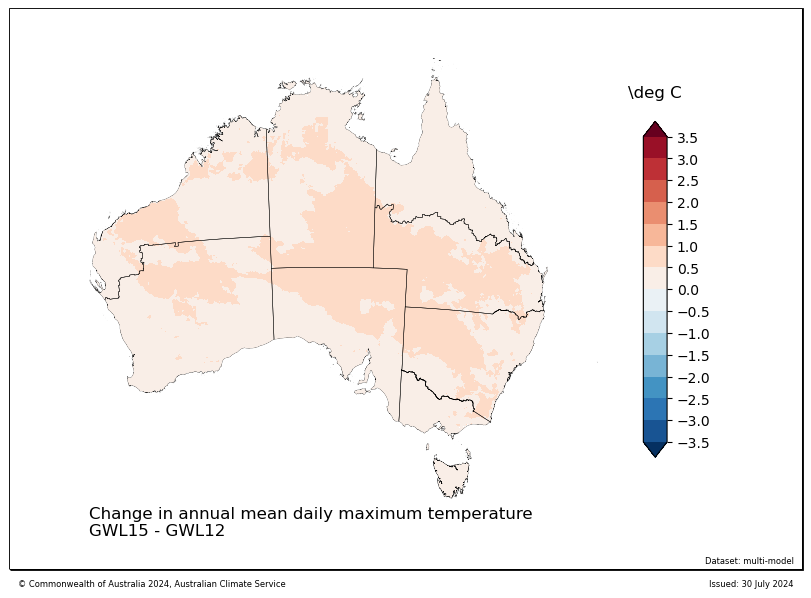

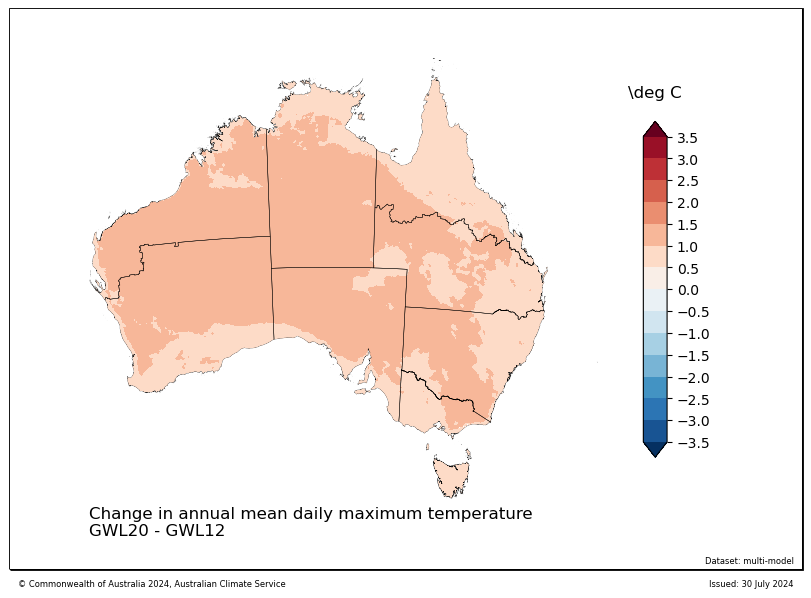

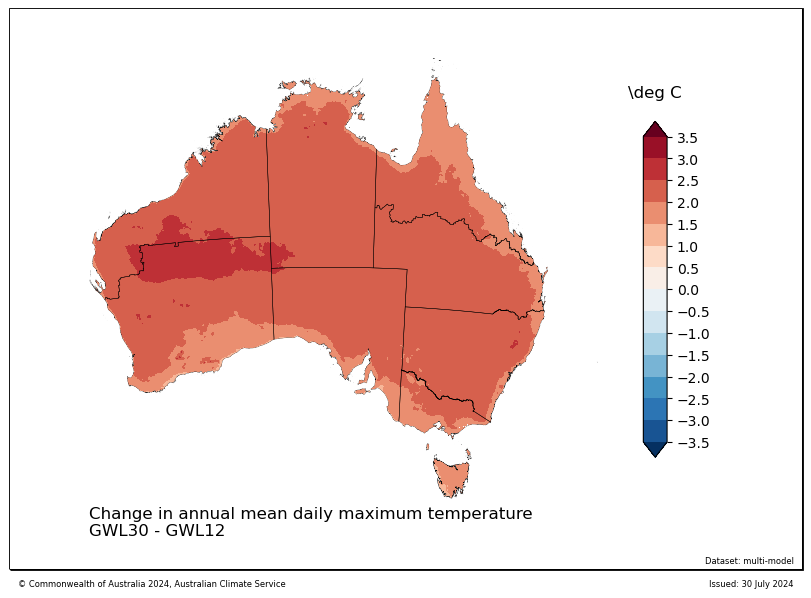

In [7]:
# heat 

var = "TXm"
for gwl in ["GWL15", "GWL20", "GWL30"]: 
    ds = xr.open_dataset(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/ensemble/GWL-change/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_{gwl}-GWL12-change.nc")
    da = ds[var]
    plot_acs_hazard(data = da,
                    regions = regions_dict['ncra_regions'],
                    title = "Change in annual mean daily maximum temperature",
                    date_range = f"{gwl} - GWL12",
                    cmap = cmap_dict["tas_anom"],
                    ticks = np.arange(-3.5, 3.6, 0.5),
                    cbar_label = "\deg C",
                    dataset_name = "multi-model",
                    watermark="",
                    show_logo=False,
                    outfile = f"/g/data/mn51/users/gt3409/plotting_maps/ministerial_brief_figures/{var}_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_{gwl}-GWL12-change.png",
                    contour=False,
                    contourf=False,
                    cbar_extend="both"
                    );

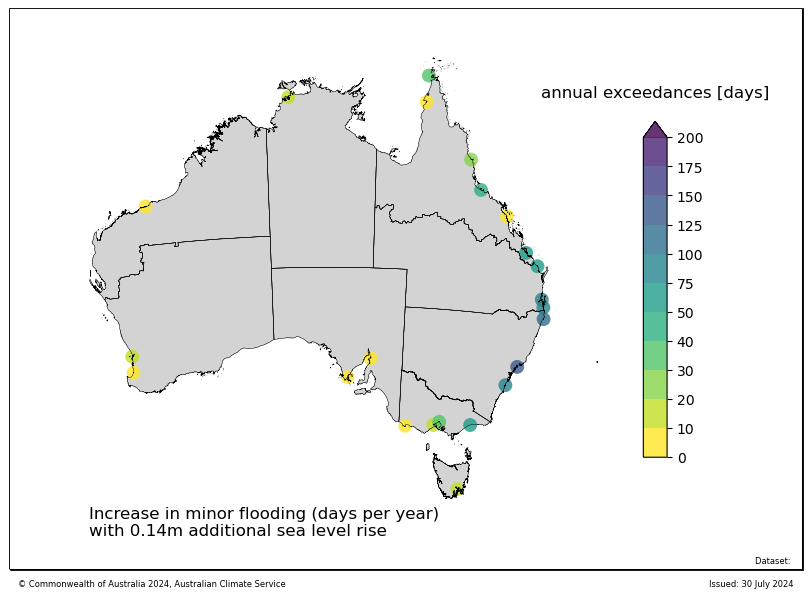

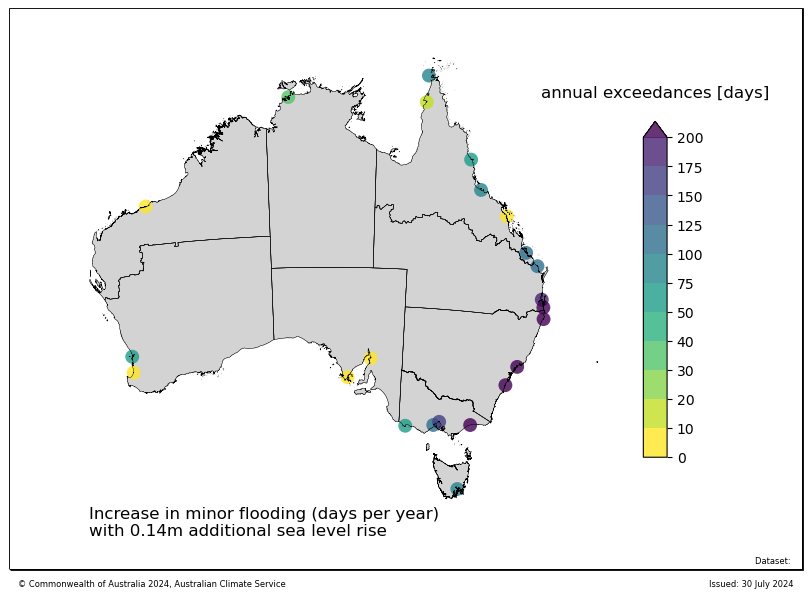

In [9]:
var = "0.2m 50th percentile"

df = pd.read_csv("/g/data/ia39/ncra/coastal/flood_days/minor_exceeds_means.csv")
for var in ["0.2m 50th percentile", "0.38m 50th percentile"]:

    plot_acs_hazard(station_df=df[["lat", "lon", var]].sort_values(var),
                    regions = regions_dict['ncra_regions'],
                    cmap=cm.viridis_r,
                    ticks=[0,10,20,30,40,50,75,100,125,150,175,200],
                    cbar_extend="max",
                    title = "Increase in minor flooding (days per year)",
                    date_range = "with 0.14m additional sea level rise",
                    cbar_label = "annual exceedances [days]",
                    dataset_name = "",
                    show_logo=False,
                    watermark=None,
                    outfile= f"/g/data/mn51/users/gt3409/plotting_maps/ministerial_brief_figures/{var.replace(' ', '-')}_minor_exceeds_means.png");

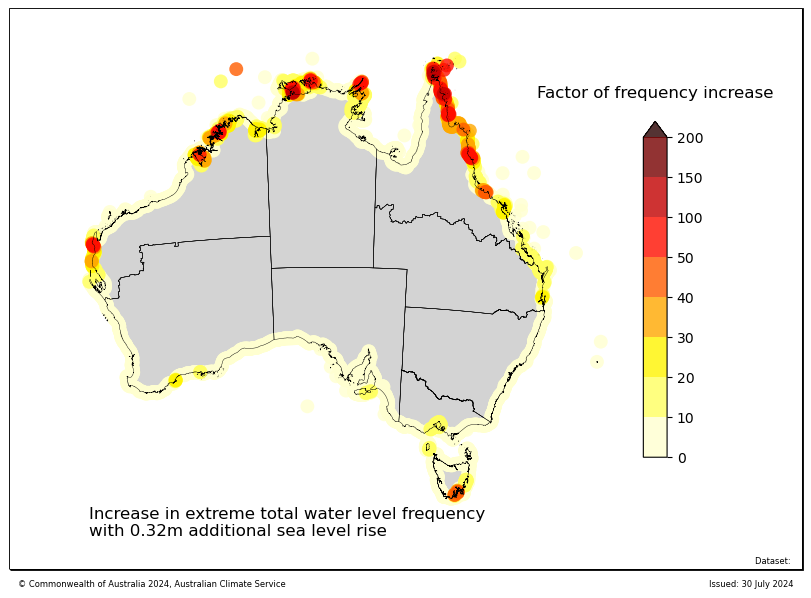

In [10]:
var = "MTWL_MFSLR_50"

df = pd.read_csv("/g/data/mn51/users/gt3409/plotting_maps/MFSLR_ACSSH_MMALL_SLR32cm.csv")
df = df.rename(columns = {"latitude":"lat", "longitude":"lon"})

plot_acs_hazard(station_df=df[["lat", "lon", var]].sort_values(var),
                regions = regions_dict['ncra_regions'],
                cmap=cmap_dict['hot_r'],
                ticks=[0, 10, 20, 30, 40, 50, 100, 150, 200],
                cbar_extend="max",
                title = "Increase in extreme total water level frequency",
                date_range = "with 0.32m additional sea level rise",
                cbar_label = "Factor of frequency increase",
                dataset_name = "",
                show_logo=False,
                watermark=None,
                outfile= f"/g/data/mn51/users/gt3409/plotting_maps/ministerial_brief_figures/{var.replace('_', '-')}_MFSLR_ACSSH_MMALL_SLR32cm.png");

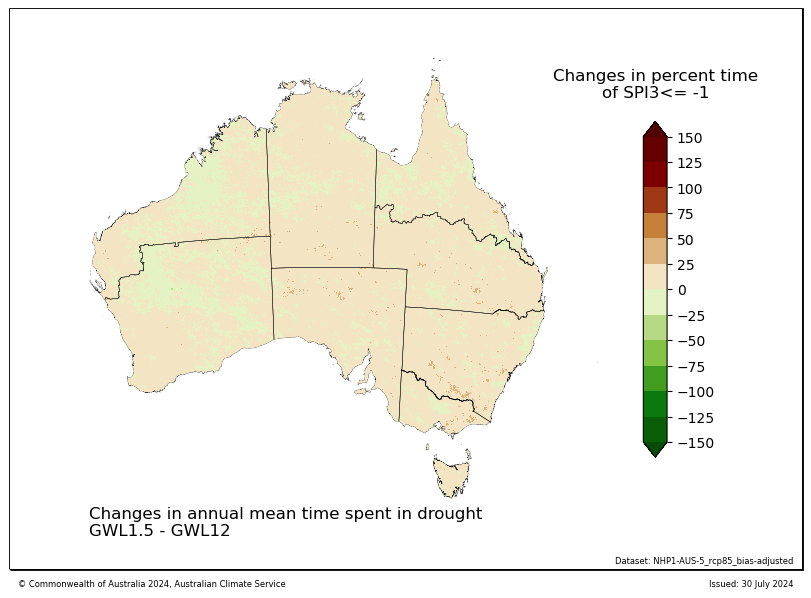

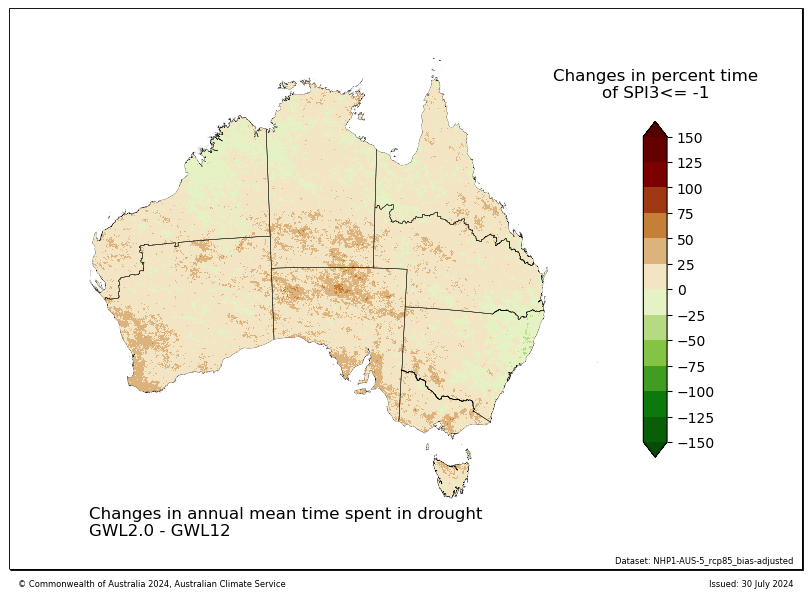

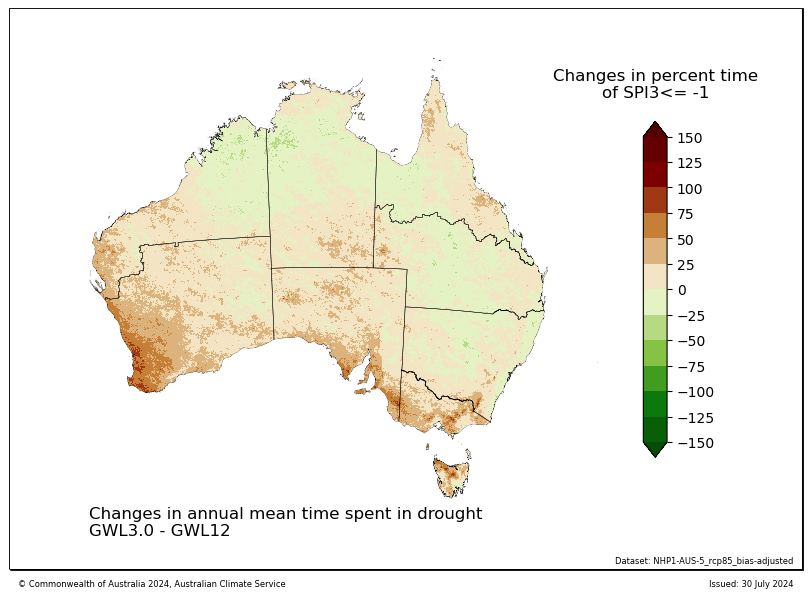

In [14]:
var="SPI3"
for gwl in ["GWL1.5", "GWL2.0", "GWL3.0"]: 

    ds = xr.open_dataset(f"/g/data/ia39/ncra/drought_aridity/spi_update/downscaled_BC_5km/SPI3_pct_time_below_-1_MME_change_{gwl}_to_GWL1.2_ACS-QME-AGCD-1960-2022_percentiles_10-50-90.nc")
    da = ds.sel(quantile = 0.5)[var]
    
    plot_acs_hazard(data =  da,
                    regions = regions_dict['ncra_regions'],
                    title = "Changes in annual mean time spent in drought",
                    date_range = f"{gwl} - GWL12",
                    cmap = cmap_dict["aridity_anom_r"],
                    ticks = np.arange(-150, 151, 25),
                    # ticks = np.arange(-100, 101, 10),
                    cbar_label = "Changes in percent time\nof SPI3<= -1",
                    dataset_name = "NHP1-AUS-5_rcp85_bias-adjusted",
                    outfile = f"/g/data/mn51/users/gt3409/plotting_maps/ministerial_brief_figures/SPI3_pct_time_below_-1_MME_change_{gwl}_to_GWL1.2_ACS-QME-AGCD-1960-2022_percentiles_50.png",
                    contour=False,
                    contourf=False,
                    cbar_extend="both",
                    watermark="",
                    show_logo=False,
                    );

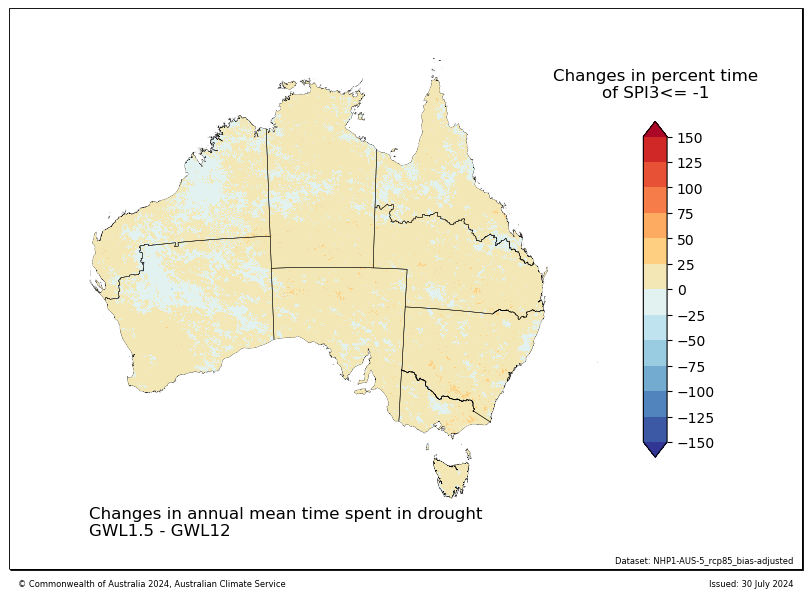

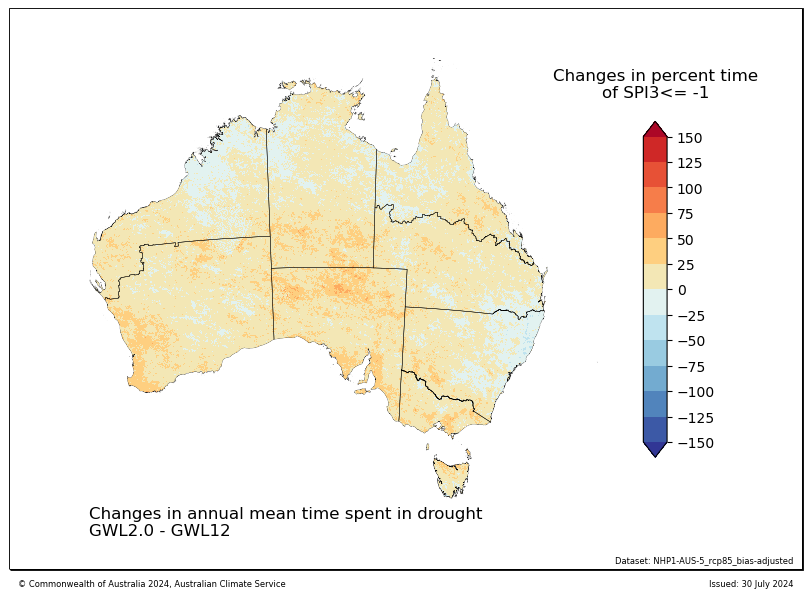

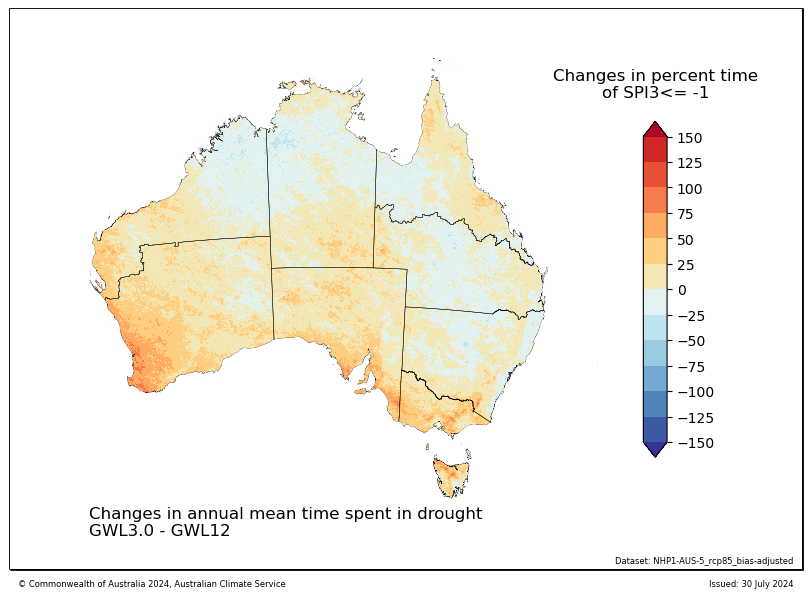

In [13]:
var="SPI3"
for gwl in ["GWL1.5", "GWL2.0", "GWL3.0"]: 

    ds = xr.open_dataset(f"/g/data/ia39/ncra/drought_aridity/spi_update/downscaled_BC_5km/SPI3_pct_time_below_-1_MME_change_{gwl}_to_GWL1.2_ACS-QME-AGCD-1960-2022_percentiles_10-50-90.nc")
    da = ds.sel(quantile = 0.5)[var]
    
    plot_acs_hazard(data =  da,
                    regions = regions_dict['ncra_regions'],
                    title = "Changes in annual mean time spent in drought",
                    date_range = f"{gwl} - GWL12",
                    cmap = cmap_dict["anom_b2r"],
                    ticks = np.arange(-150, 151, 25),
                    # ticks = np.arange(-100, 101, 10),
                    cbar_label = "Changes in percent time\nof SPI3<= -1",
                    dataset_name = "NHP1-AUS-5_rcp85_bias-adjusted",
                    outfile = f"/g/data/mn51/users/gt3409/plotting_maps/ministerial_brief_figures/SPI3_pct_time_below_-1_MME_change_{gwl}_to_GWL1.2_ACS-QME-AGCD-1960-2022_percentiles_50.png",
                    contour=False,
                    contourf=False,
                    cbar_extend="both",
                    watermark="",
                    show_logo=False,
                    );

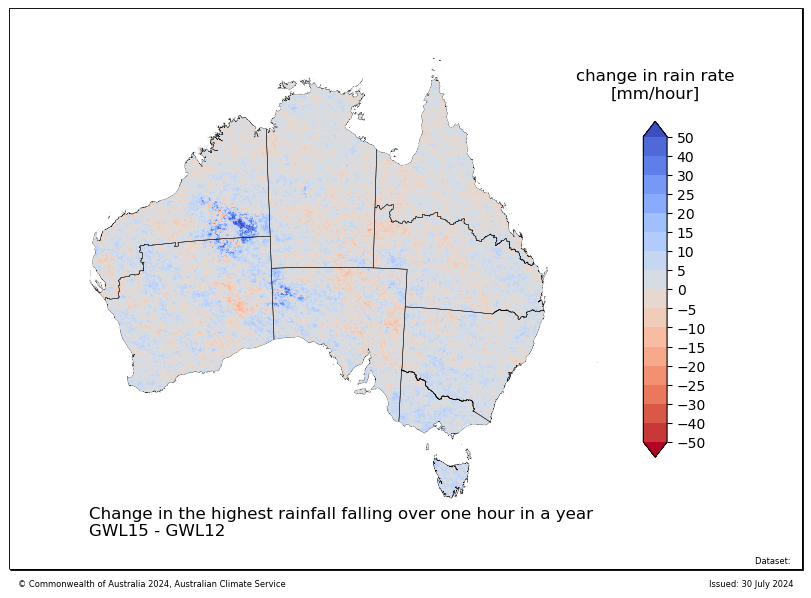

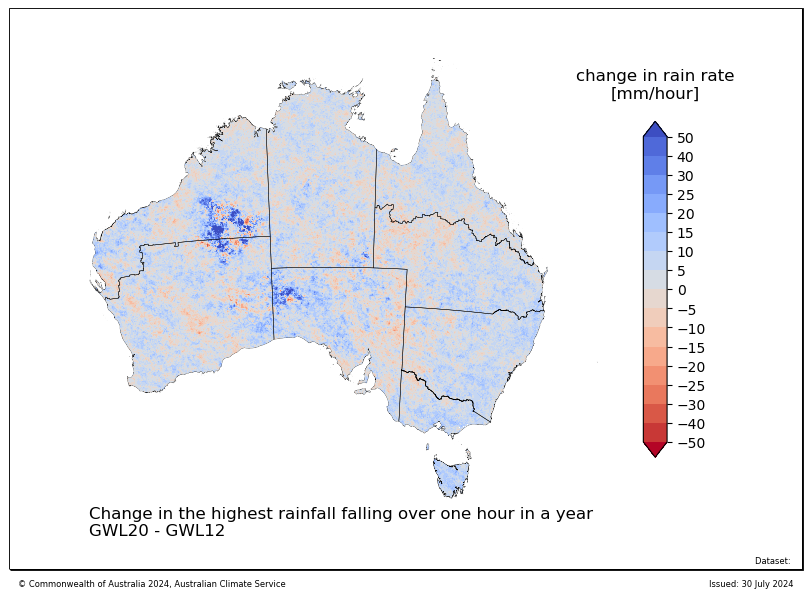

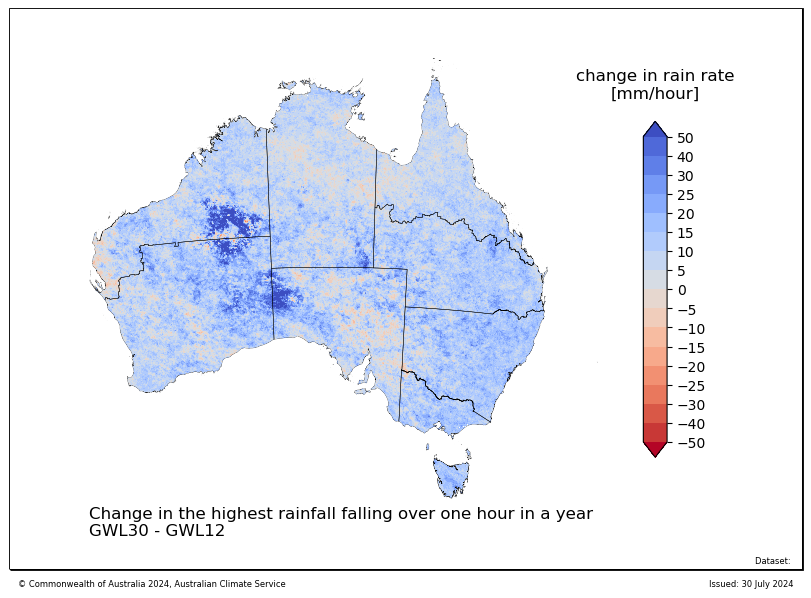

In [16]:
var="RX1H"
for gwl in ["GWL15", "GWL20", "GWL30"]: 

    ds = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/bias-corrected/ACS-QME-AGCD-1960-2022/GWLs/{var}_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_{gwl}_change.nc")
    da = ds["prhmax"]
    
    plot_acs_hazard(data =  da,
                    regions = regions_dict['ncra_regions'],
                    title = "Change in the highest rainfall falling over one hour in a year",
                    date_range = f"{gwl} - GWL12",
                    cmap = cmap_dict["anom_coolwarm_r"],
                    ticks = [-50, -40, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 40, 50],
                    cbar_label = "change in rain rate\n[mm/hour]",
                    dataset_name = "",
                    outfile = f"/g/data/mn51/users/gt3409/plotting_maps/ministerial_brief_figures/{var}_AGCD-05i_MM50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_{gwl}_change.png",
                    contour=False,
                    contourf=False,
                    cbar_extend="both",
                    watermark="",
                    show_logo=False,
                    );

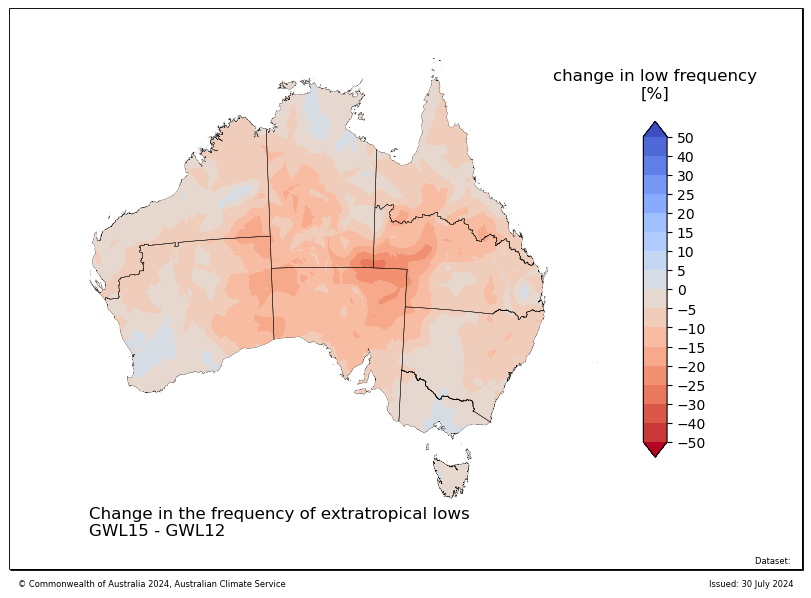

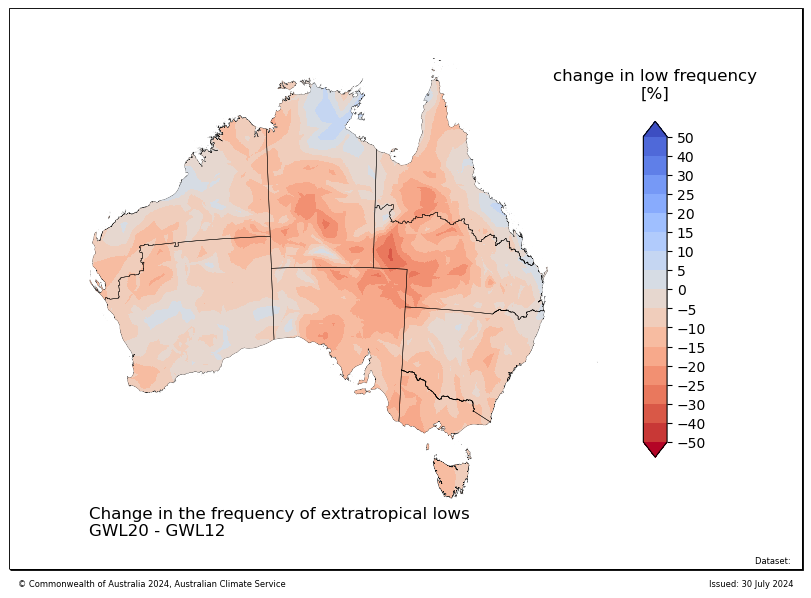

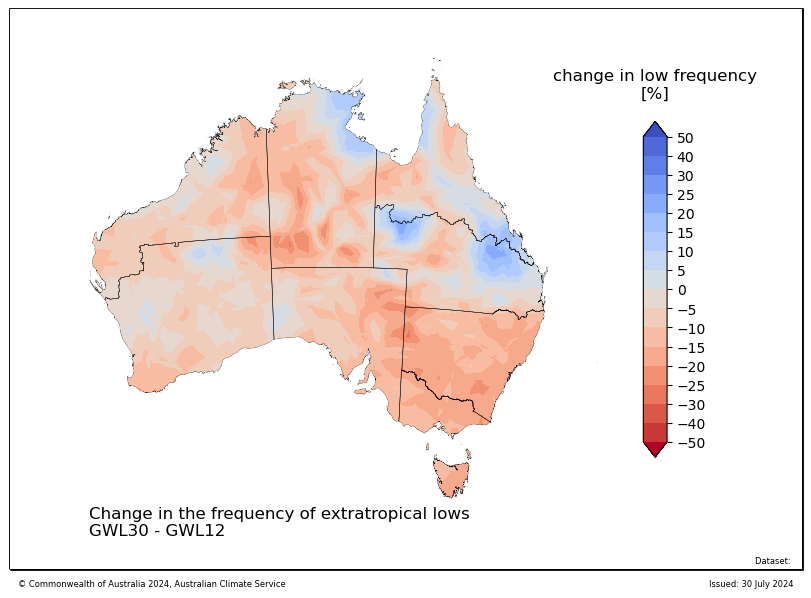

In [17]:
var="lows"
for gwl in ["GWL15", "GWL20", "GWL30"]: 

    ds = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/{var}_AGCD-05i_MM50_ssp370_v1-r1_{gwl}_change.nc")
    da = ds["low_freq"]
    
    plot_acs_hazard(data =  da,
                    regions = regions_dict['ncra_regions'],
                    title = "Change in the frequency of extratropical lows ",
                    date_range = f"{gwl} - GWL12",
                    cmap = cmap_dict["anom_coolwarm_r"],
                    ticks = [-50, -40, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 40, 50],
                    cbar_label = "change in low frequency\n[%]",
                    dataset_name = "",
                    outfile = f"/g/data/mn51/users/gt3409/plotting_maps/ministerial_brief_figures/{var}_AGCD-05i_MM50_ssp370_v1-r1_{gwl}_change.png",
                    contour=False,
                    contourf=False,
                    cbar_extend="both",
                    watermark="",
                    show_logo=False,
                    );

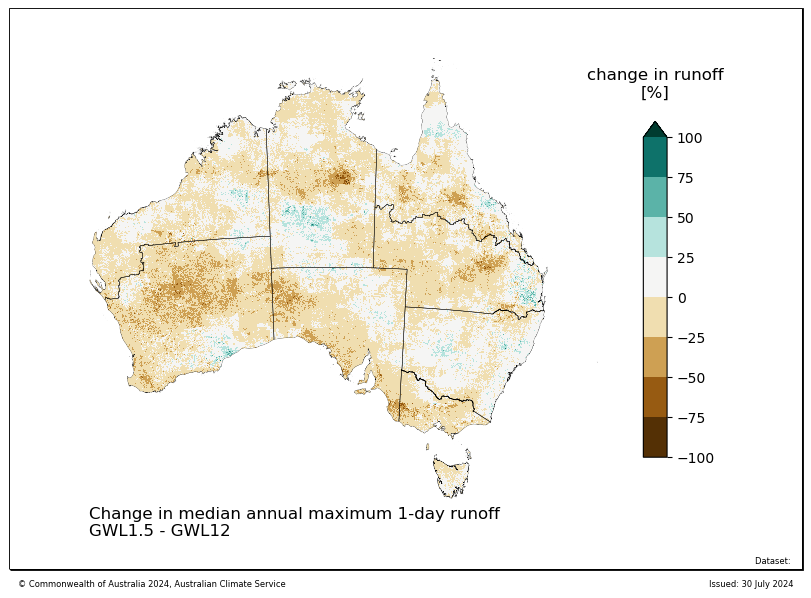

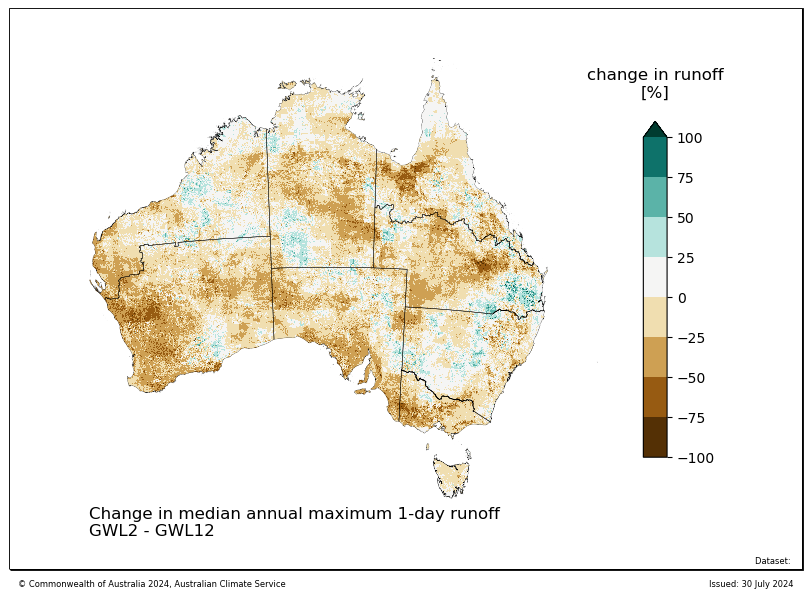

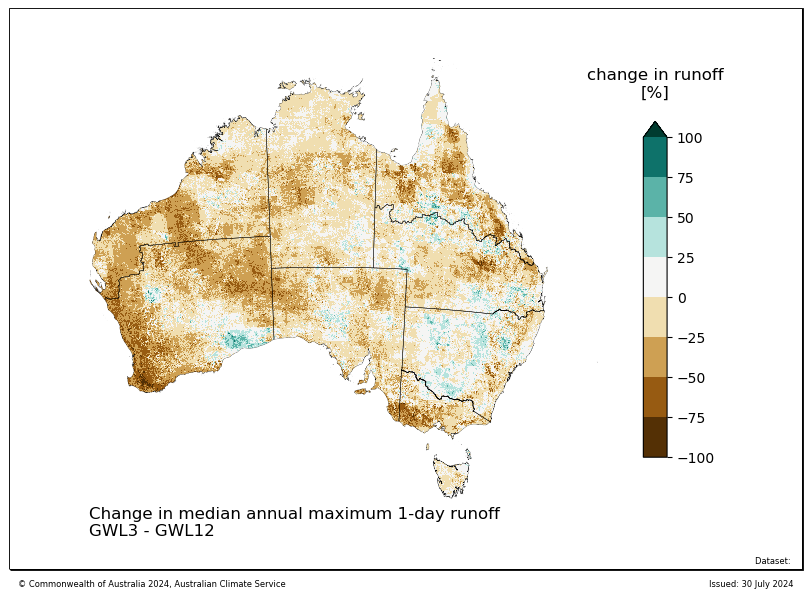

In [19]:
for gwl in ["1.5", "2", "3"]:
    

    ds = xr.open_dataset(f"/g/data/ia39/ncra/flood/Runoff_Max1D/runoff_max1day_ens_change_perc/max1day_runoff_ens_change_perc_{gwl}.nc")
    ds = ds.rename({"longitude":"lon", "latitude":"lat"})
    da = ds.sel(quantile = 0.5)[f"runoff_{gwl}"]
    
    plot_acs_hazard(data =  da,
                    regions = regions_dict['ncra_regions'],
                    title = "Change in median annual maximum 1-day runoff",
                    date_range = f"GWL{gwl} - GWL12",
                    cmap = cmap_dict["pr_anom"],
                    ticks = np.arange(-100, 101,25),
                    cbar_label = "change in runoff\n[%]",
                    dataset_name = "",
                    outfile = f"/g/data/mn51/users/gt3409/plotting_maps/ministerial_brief_figures/max1day_runoff_ens_change_perc_{gwl}.png",
                    contour=False,
                    contourf=False,
                    cbar_extend="max",
                    watermark="",
                    show_logo=False,
                    );